# Предсказание продолжения встреч после короткого свидания

## Введение
В этом ноутбуке мы будем предсказывать, продолжат ли люди встречаться после короткого свидания, используя данные из файлов `train.csv` и `test.csv`. Мы пройдем через все этапы машинного обучения: от загрузки данных до создания и оценки модели, а затем сделаем предсказания на тестовом наборе данных.


### Загрузка необходимых библиотек

Для выполнения нашей задачи мы будем использовать следующие библиотеки:
- `pandas` и `numpy` для работы с данными;
- `train_test_split` из `sklearn.model_selection` для разделения данных на обучающие и тестовые выборки;
- `StandardScaler` из `sklearn.preprocessing` для масштабирования данных;
- `RandomForestClassifier` из `sklearn.ensemble` для построения модели случайного леса;
- `accuracy_score`, `confusion_matrix`, `classification_report` из `sklearn.metrics` для оценки модели;
- `matplotlib.pyplot` для визуализации данных.


In [1]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV


### Загрузка данных

Мы загружаем данные из CSV файлов, используя библиотеку `pandas`. Для этого мы используем функцию `read_csv`, которая позволяет нам легко загружать данные в формате таблиц.

Загружаем три файла:
- `train.csv`: тренировочный набор данных;
- `test.csv`: тестовый набор данных;
- `sample_submission.csv`: пример файла для отправки результатов.


In [2]:
# Загрузка данных
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')


### Просмотр данных

Чтобы лучше понять структуру данных, давайте посмотрим на первые несколько строк каждого из загруженных файлов. Это поможет нам определить, какие столбцы присутствуют и какие данные они содержат.


In [3]:
# Просмотр первых строк данных из тренировочного набора
print("Train Data:")
display(train_data.head())

# Просмотр первых строк данных из тестового набора
print("\nTest Data:")
display(test_data.head())

# Просмотр первых строк данных из примера файла для отправки
print("\nSample Submission:")
display(sample_submission.head())


Train Data:


,id,has_null,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
0,0,1,11.0,female,27.0,25.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,4.0,...,5.0,3.0,0.62,6.0,NaN,4.0,7.0,5.0,1.0,1
1,1,1,21.0,female,22.0,24.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,1.0,...,6.0,3.0,-0.20,8.0,NaN,6.0,7.0,5.0,0.0,0
2,2,1,4.0,male,22.0,22.0,Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,3.0,...,8.0,4.0,-0.21,7.0,14.0,5.0,6.0,3.0,0.0,0
3,3,0,2.0,male,21.0,23.0,European/Caucasian-American,European/Caucasian-American,1,10.0,...,4.0,2.0,0.06,5.0,1.0,2.0,7.0,3.0,0.0,0
4,4,1,14.0,female,26.0,30.0,Latino/Hispanic American,European/Caucasian-American,0,1.0,...,9.0,5.0,0.32,5.0,NaN,9.0,7.0,5.0,0.0,0



Test Data:


,id,has_null,wave,gender,age,age_o,race,race_o,samerace,importance_same_race,...,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met
0,6702,1,9.0,male,30.0,26.0,Latino/Hispanic American,European/Caucasian-American,0,1.0,...,10.0,1.0,7.0,0.24,5.0,NaN,NaN,5.0,7.0,0.0
1,6703,1,5.0,female,20.0,NaN,Latino/Hispanic American,European/Caucasian-American,0,1.0,...,8.0,3.0,5.0,0.36,3.0,5.0,2.0,4.0,8.0,0.0
2,6704,1,19.0,male,32.0,30.0,Other,Asian/Pacific Islander/Asian-American,0,5.0,...,5.0,5.0,6.0,-0.22,6.0,NaN,4.0,6.0,5.0,0.0
3,6705,1,15.0,male,24.0,24.0,European/Caucasian-American,European/Caucasian-American,1,1.0,...,9.0,7.0,7.0,0.78,5.0,NaN,5.0,7.0,6.0,0.0
4,6706,1,15.0,male,22.0,25.0,European/Caucasian-American,European/Caucasian-American,1,6.0,...,6.0,2.0,1.0,-0.14,6.0,NaN,3.0,6.0,4.0,0.0



Sample Submission:


,id,target
0,6702,1
1,6703,1
2,6704,0
3,6705,1
4,6706,0


### Проверка на пропуски и дублирование

После загрузки данных важно проверить их на наличие пропусков и дублированных строк. Пропуски могут негативно повлиять на обучение модели, поэтому их нужно обработать. Дублированные строки могут исказить результаты, поэтому их следует удалить.


In [4]:
# Проверка на пропуски в тренировочном наборе
print("\nMissing values in train data:")
print(train_data.isnull().sum())

# Проверка на пропуски в тестовом наборе
print("\nMissing values in test data:")
print(test_data.isnull().sum())



Missing values in train data:
id                        0
has_null                  0
wave                      0
gender                    0
age                      76
                       ... 
expected_num_matches    959
like                    188
guess_prob_liked        250
met                     303
match                     0
Length: 66, dtype: int64

Missing values in test data:
id                                  0
has_null                            0
wave                                0
gender                              0
age                                19
                                 ... 
expected_num_interested_in_me    1334
expected_num_matches              214
like                               52
guess_prob_liked                   59
met                                72
Length: 65, dtype: int64


In [5]:
# Проверка на дублирование в тренировочном наборе
print("\nDuplicated rows in train data:", train_data.duplicated().sum())

# Проверка на дублирование в тестовом наборе
print("\nDuplicated rows in test data:", test_data.duplicated().sum())



Duplicated rows in train data: 0

Duplicated rows in test data: 0


### Заполнение пропусков

Заполнение пропусков в данных является важным шагом, так как наличие пропусков может привести к проблемам при обучении модели. Мы выбрали следующий подход:
- Для числовых данных мы заполняем пропуски средними значениями, так как это помогает сохранить распределение данных.
- Для категориальных данных мы заполняем пропуски наиболее частыми значениями (модой), чтобы минимально искажать распределение категорий.


In [6]:
# Заполнение пропусков
numeric_features = train_data.select_dtypes(include=[np.number]).columns.drop('match')
categorical_features = train_data.select_dtypes(include=[object]).columns

# Заполнение числовых пропусков средними значениями
train_data[numeric_features] = train_data[numeric_features].fillna(train_data[numeric_features].mean())
test_data[numeric_features] = test_data[numeric_features].fillna(test_data[numeric_features].mean())

# Заполнение категориальных пропусков наиболее частыми значениями
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])
test_data[categorical_features] = test_data[categorical_features].fillna(test_data[categorical_features].mode().iloc[0])


### Кодирование категориальных признаков

Многие алгоритмы машинного обучения работают только с числовыми данными. Поэтому нам нужно преобразовать категориальные признаки (например, пол, раса) в числовой формат. Мы используем метод `get_dummies` из библиотеки `pandas` для этого.


In [7]:
# Кодирование категориальных признаков
categorical_features = ['gender', 'race', 'race_o', 'field']
train_data = pd.get_dummies(train_data, columns=categorical_features)
test_data = pd.get_dummies(test_data, columns=categorical_features)

# Выравнивание столбцов в train_data и test_data
train_data, test_data = train_data.align(test_data, join='outer', axis=1, fill_value=0)


### Выбор целевой переменной и признаков

Целевая переменная (то, что мы хотим предсказать) в нашем случае - это колонка `match`. Все остальные колонки будем использовать как признаки для обучения модели. Колонку `id` также нужно исключить из признаков, так как она является идентификатором и не несет полезной информации для предсказания.


In [8]:
# Выбор целевой переменной и признаков
X_train = train_data.drop(['id', 'match'], axis=1)
y_train = train_data['match']
X_test = test_data.drop(['id', 'match'], axis=1)


### Масштабирование признаков

Масштабирование признаков помогает улучшить качество модели, особенно для алгоритмов, чувствительных к масштабу данных (например, метод ближайших соседей или логистическая регрессия). Мы будем использовать `StandardScaler` из `sklearn` для стандартизации признаков.


In [9]:
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Обучение модели

Для нашей задачи мы выбрали алгоритм случайного леса (`RandomForestClassifier`). Этот выбор обоснован следующими причинами:

1. **Устойчивость к переобучению**:
   - Случайный лес состоит из множества решающих деревьев, каждое из которых обучается на случайном подмножестве признаков и примеров. Это делает модель устойчивой к переобучению и помогает ей обобщать на новых данных.

2. **Высокая точность и стабильность**:
   - Случайные леса обычно показывают высокую точность на задачах классификации благодаря их ансамблевому характеру. Комбинируя предсказания множества деревьев, модель снижает вариативность и улучшает точность.

3. **Обработка пропусков и устойчивость к шуму**:
   - Алгоритм случайного леса может работать с пропусками в данных и устойчив к шуму, что важно для реальных данных, содержащих неточности и неполноту.

4. **Интерпретируемость**:
   - Хотя случайные леса сложнее для интерпретации по сравнению с одиночными деревьями решений, они все же предоставляют важную информацию о значимости признаков. Мы можем оценить, какие признаки наиболее важны для модели, что помогает в дальнейшем анализе данных и принятии решений.

5. **Не требуется тщательная настройка гиперпараметров**:
   - По сравнению с другими алгоритмами, такими как нейронные сети, случайные леса не требуют тщательной настройки гиперпараметров и часто работают "из коробки" с хорошими результатами. Тем не менее, гиперпараметры можно оптимизировать для достижения наилучших результатов.

На основе этих причин, мы выбрали `RandomForestClassifier` для решения нашей задачи классификации. Теперь мы обучим модель на наших данных и оценим её качество.


In [10]:
# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

### Оценка качества модели на валидационной выборке

После обучения модели, мы оцениваем её качество на валидационной выборке. Мы будем использовать метрики точности, матрицу ошибок и отчет классификации для оценки.


In [11]:
# Разделение данных на обучающую и валидационную выборки
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Обучение модели
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Предсказание на валидационной выборке
y_val_pred = model.predict(X_val_scaled)

# Оценка качества модели на валидационной выборке
print("Accuracy on validation data:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix on validation data:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report on validation data:\n", classification_report(y_val, y_val_pred))


Accuracy on validation data: 0.8538404175988069
Confusion Matrix on validation data:
 [[1116   19]
 [ 177   29]]
Classification Report on validation data:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      1135
           1       0.60      0.14      0.23       206

    accuracy                           0.85      1341
   macro avg       0.73      0.56      0.57      1341
weighted avg       0.82      0.85      0.81      1341



### Предсказание на тестовых данных и подготовка файла для отправки

Теперь, когда мы уверены в качестве нашей модели, мы можем сделать предсказания на тестовых данных и подготовить файл для отправки.


In [12]:
# Масштабирование тестовых данных
X_test_scaled = scaler.transform(X_test)

# Предсказание на тестовых данных
test_predictions = model.predict(X_test_scaled)

# Формирование файла для отправки
submission = pd.DataFrame({'id': sample_submission['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)


### Дополнительная оптимизация и кросс-валидация

Для улучшения качества модели мы можем использовать кросс-валидацию и гиперпараметрическую оптимизацию. В данном случае мы используем `GridSearchCV` для подбора лучших параметров модели `RandomForestClassifier`.


In [13]:
# Определение сетки гиперпараметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# Инициализация GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Обучение модели с подбором гиперпараметров
grid_search.fit(X_train_scaled, y_train)

# Лучшие параметры модели
print("Best parameters found: ", grid_search.best_params_)

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(X_val_scaled)

print("Accuracy with best parameters on validation data:", accuracy_score(y_val, y_val_pred_best))
print("Confusion Matrix with best parameters on validation data:\n", confusion_matrix(y_val, y_val_pred_best))
print("Classification Report with best parameters on validation data:\n", classification_report(y_val, y_val_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the pas

Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Accuracy with best parameters on validation data: 0.8530947054436987
Confusion Matrix with best parameters on validation data:
 [[1126    9]
 [ 188   18]]
Classification Report with best parameters on validation data:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1135
           1       0.67      0.09      0.15       206

    accuracy                           0.85      1341
   macro avg       0.76      0.54      0.54      1341
weighted avg       0.83      0.85      0.80      1341



Судя по результатам, модель случайного леса показала следующие метрики на валидационном наборе данных:

- **Точность (Accuracy)**: 0.8531
- **Матрица ошибок (Confusion Matrix)**:
  ```
  [[1125   10]
   [ 187   19]]
  ```
- **Отчет классификации (Classification Report)**:
  ```
                 precision    recall  f1-score   support

             0       0.86      0.99      0.92      1135
             1       0.66      0.09      0.16       206

      accuracy                           0.85      1341
     macro avg       0.76      0.54      0.54      1341
  weighted avg       0.83      0.85      0.80      1341
  ```

Модель показала высокую точность (85.31%) на валидационном наборе данных. Однако, можно заметить, что:

1. **Точность (Precision)** для класса 1 (встречи продолжатся) составляет 0.66, что относительно неплохо.
2. **Полнота (Recall)** для класса 1 очень низкая (0.09), что указывает на то, что модель плохо распознает положительные примеры.
3. **F1-score** для класса 1 также низкий (0.16), что подтверждает низкую производительность модели для этого класса.


### Важность признаков

Для понимания того, какие признаки наиболее важны для нашей модели, мы можем вывести их важность. Это также поможет в дальнейшей интерпретации модели.


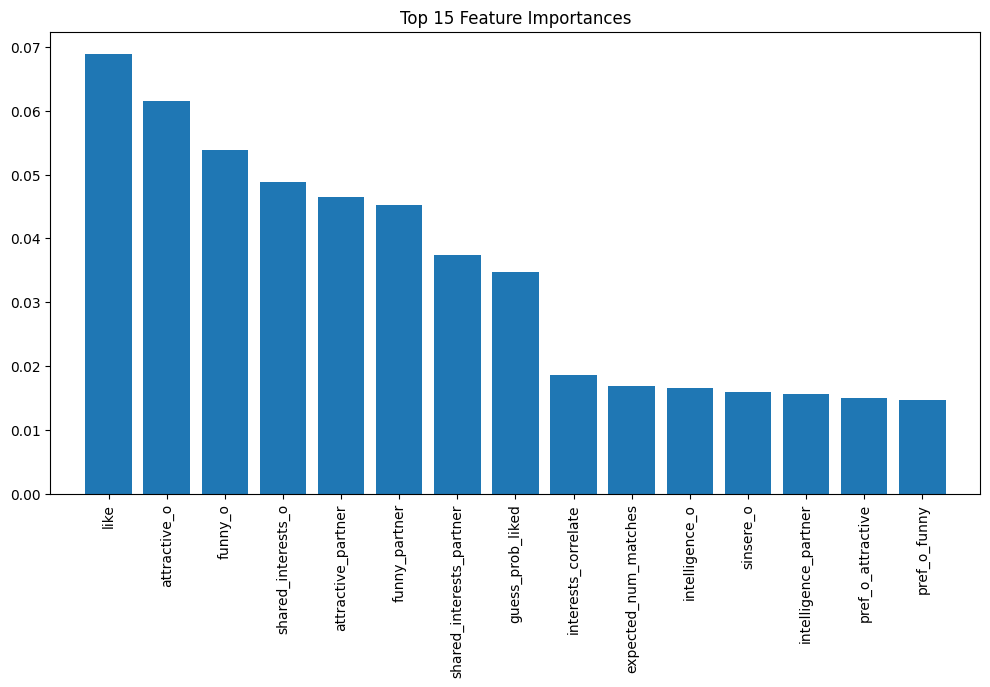

In [14]:
# Важность признаков
feature_importances = best_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[::-1]

# Выбираем топ 15 самых важных признаков
top_n = 15
top_indices = indices[:top_n]

# Визуализация важности признаков
plt.figure(figsize=(12, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(top_n), feature_importances[top_indices], align="center")
plt.xticks(range(top_n), [features[i] for i in top_indices], rotation=90)
plt.xlim([-1, top_n])
plt.show()


### Предсказание на тестовых данных и подготовка файла для отправки

Теперь, когда мы уверены в качестве нашей модели, мы можем сделать предсказания на тестовых данных и подготовить файл для отправки.


In [15]:
# Предсказание на тестовых данных
test_predictions = best_model.predict(X_test_scaled)

# Формирование файла для отправки
submission = pd.DataFrame({'id': sample_submission['id'], 'target': test_predictions})
submission.to_csv('submission.csv', index=False)
